In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [84]:
n=100

In [85]:
??torch.index_select

In [108]:
x = torch.ones(n,3) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.5363,  1.0000,  1.0000],
        [-0.0097,  1.0000,  1.0000],
        [ 0.7091,  1.0000,  1.0000],
        [-0.0515,  1.0000,  1.0000],
        [-0.1956,  1.0000,  1.0000]])

In [109]:
x = torch.index_select(x, 1, torch.tensor([0,0,2]))

In [110]:
x[:,0].apply_(lambda a: a**2)
x[:5]

tensor([[ 2.8767e-01,  5.3635e-01,  1.0000e+00],
        [ 9.4970e-05, -9.7452e-03,  1.0000e+00],
        [ 5.0282e-01,  7.0910e-01,  1.0000e+00],
        [ 2.6482e-03, -5.1461e-02,  1.0000e+00],
        [ 3.8268e-02, -1.9562e-01,  1.0000e+00]])

In [111]:
a = tensor(3.,1.,2.); a

tensor([3., 1., 2.])

In [117]:
y = x@a + torch.rand(n)

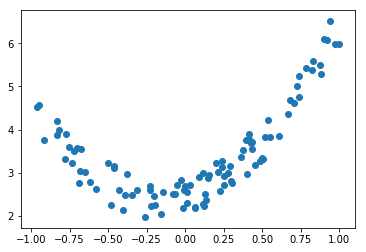

In [118]:
plt.scatter(x[:,1], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [119]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [134]:
a = tensor(-1.,1,-1)

In [135]:
y_hat = x@a
mse(y_hat, y)

tensor(22.9102)

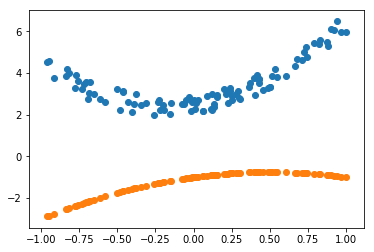

In [136]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [138]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1., -1.], requires_grad=True)

In [157]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [160]:
lr = 1e-1
for t in range(100): update()

tensor(0.1582, grad_fn=<MeanBackward0>)
tensor(0.1388, grad_fn=<MeanBackward0>)
tensor(0.1244, grad_fn=<MeanBackward0>)
tensor(0.1137, grad_fn=<MeanBackward0>)
tensor(0.1058, grad_fn=<MeanBackward0>)
tensor(0.0999, grad_fn=<MeanBackward0>)
tensor(0.0956, grad_fn=<MeanBackward0>)
tensor(0.0923, grad_fn=<MeanBackward0>)
tensor(0.0899, grad_fn=<MeanBackward0>)
tensor(0.0881, grad_fn=<MeanBackward0>)


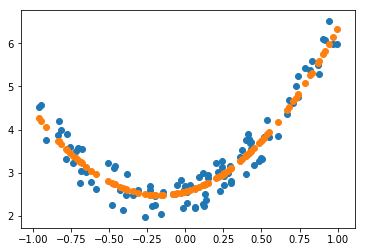

In [161]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],x@a);

## Animate it!

In [130]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [162]:
a = nn.Parameter(tensor(-1.,1,-1))

fig = plt.figure()
plt.scatter(x[:,1], y, c='orange')
line, = plt.plot(x[:,1], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.